<a href="https://colab.research.google.com/github/BayramovaNazrin/test1/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly Detection Project**

# **Load Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

features = '/content/drive/MyDrive/anomaly_detection/elliptic_txs_features.csv'
edges = '/content/drive/MyDrive/anomaly_detection/elliptic_txs_edgelist.csv'
classes = '/content/drive/MyDrive/anomaly_detection/elliptic_txs_classes.csv'
features = pd.read_csv(features, header=None)
edges = pd.read_csv(edges)
classes = pd.read_csv(classes, header=None)
num_cols = features.shape[1]
feature_cols = ['txId', 'time_step'] + [f'feature_{i}' for i in range(1, num_cols - 1)]
features.columns = feature_cols
classes.columns = ['txId', 'class']
classes['class'] = classes['class'].astype(str).str.strip().replace({  'unknown': 3})

features['txId'] = features['txId'].astype(str)
classes['txId'] = classes['txId'].astype(str)


merged_df = features.merge(classes, on='txId', how='left')
merged_df['class'] = pd.to_numeric(merged_df['class'], errors='coerce')



# **Dataset Summary**

## Initial Inspection

In [ ]:


# 1. Basic counts
num_nodes = features.shape[0]
num_edges = edges.shape[0]
num_transactions = merged_df.shape[0]
# 2. Label distribution (licit / illicit / unlabeled)

licit = merged_df['class'].eq(2).sum()
illicit = (merged_df['class'] == 1).sum()
unlabeled = merged_df['class'].eq(3).sum()
nan_count = merged_df['class'].isna().sum()
num_nodes = merged_df.shape[0]
num_edges = edges.shape[0]
total_labeled = licit + illicit + unlabeled + nan_count

# 3. Percentages
licit_pct = licit / num_nodes * 100
illicit_pct = illicit / num_nodes * 100
unlabeled_pct = unlabeled / num_nodes * 100


# 4. Display summary
print(f"Nodes: {num_nodes:,}")
print(f"Edges: {num_edges:,}")
print(f"Transactions: {num_transactions:,}")
print(f"Labeled: Licit (class=1): {licit:,} ({licit_pct:.1f}%)")
print(f"Labeled: Illicit (class=2): {illicit:,} ({illicit_pct:.1f}%)")
print(f"Unlabeled: {unlabeled:,} ({unlabeled_pct:.1f}%)")

#Checking for null values
missing = merged_df.isna().sum()
missing = missing[missing > 0]
print("Columns with missing values:\n", missing if not missing.empty else "None found ✅")



Nodes: 203,769
Edges: 234,355
Transactions: 203,769
Labeled: Licit (class=1): 42,019 (20.6%)
Labeled: Illicit (class=2): 4,545 (2.2%)
Unlabeled: 157,205 (77.1%)
Columns with missing values:
 None found ✅


licit is 2 and illicit is 1 and unknown is 3

## Descriptive Statistics

In [ ]:
print(features.describe().T, '\n', '------------------------------------------------------')
print(edges.describe().T, '\n', '------------------------------------------------------')
print(classes.describe().T,  '\n', '------------------------------------------------------')


                count          mean        std       min       25%        50%  \
time_step    203769.0  2.384396e+01  15.172170  1.000000  9.000000  23.000000   
feature_1    203769.0  2.454849e-17   1.000002 -0.172983 -0.172532  -0.169204   
feature_2    203769.0 -7.531922e-18   1.000002 -0.210553 -0.180327  -0.132897   
feature_3    203769.0  2.231681e-17   1.000002 -1.756361 -1.201369   0.463609   
feature_4    203769.0  6.241732e-17   1.000002 -0.121970 -0.121970  -0.121970   
...               ...           ...        ...       ...       ...        ...   
feature_161  203769.0  2.231681e-18   1.000002 -0.125939 -0.087490  -0.087490   
feature_162  203769.0  5.244450e-17   1.000002 -0.131155 -0.131155  -0.131155   
feature_163  203769.0  1.562177e-17   1.000002 -0.269818 -0.140597  -0.097524   
feature_164  203769.0  4.072817e-17   1.000002 -1.760926 -0.120613  -0.120613   
feature_165  203769.0  5.913954e-17   1.000002 -1.760984 -0.119792  -0.119792   

                   75%     

## Check for Data Types


In [ ]:
print('These are data types of features table;', '\n',features.dtypes, '\n', '-----------------------------------------' )
print('These are data types of edges table;','\n',edges.dtypes, '\n', '-----------------------------------------------' )
print('These are data types of classes table;','\n', classes.dtypes,'\n', '---------------------------------------------' )

These are data types of features table; 
 txId            object
time_step        int64
feature_1      float64
feature_2      float64
feature_3      float64
                ...   
feature_161    float64
feature_162    float64
feature_163    float64
feature_164    float64
feature_165    float64
Length: 167, dtype: object 
 -----------------------------------------
These are data types of edges table; 
 txId1    int64
txId2    int64
dtype: object 
 -----------------------------------------------
These are data types of classes table; 
 txId     object
class    object
dtype: object 
 ---------------------------------------------


## Check for Missing Values

In [ ]:
print("Missing values in features:", features.isna().sum())
print("Missing values in edges:", edges.isna().sum())
print("Missing values in classes:", classes.isna().sum())


Missing values in features: txId           0
time_step      0
feature_1      0
feature_2      0
feature_3      0
              ..
feature_161    0
feature_162    0
feature_163    0
feature_164    0
feature_165    0
Length: 167, dtype: int64
Missing values in edges: txId1    0
txId2    0
dtype: int64
Missing values in classes: txId     0
class    0
dtype: int64


## Visualize Feature Distributions

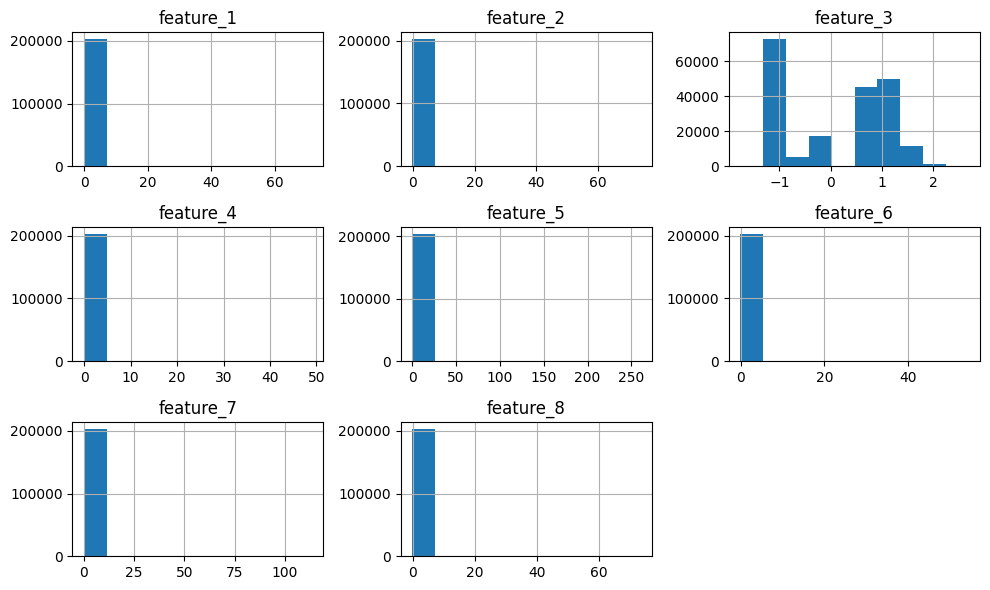

In [4]:
features.iloc[:, 2:10].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

## Examine Correlation

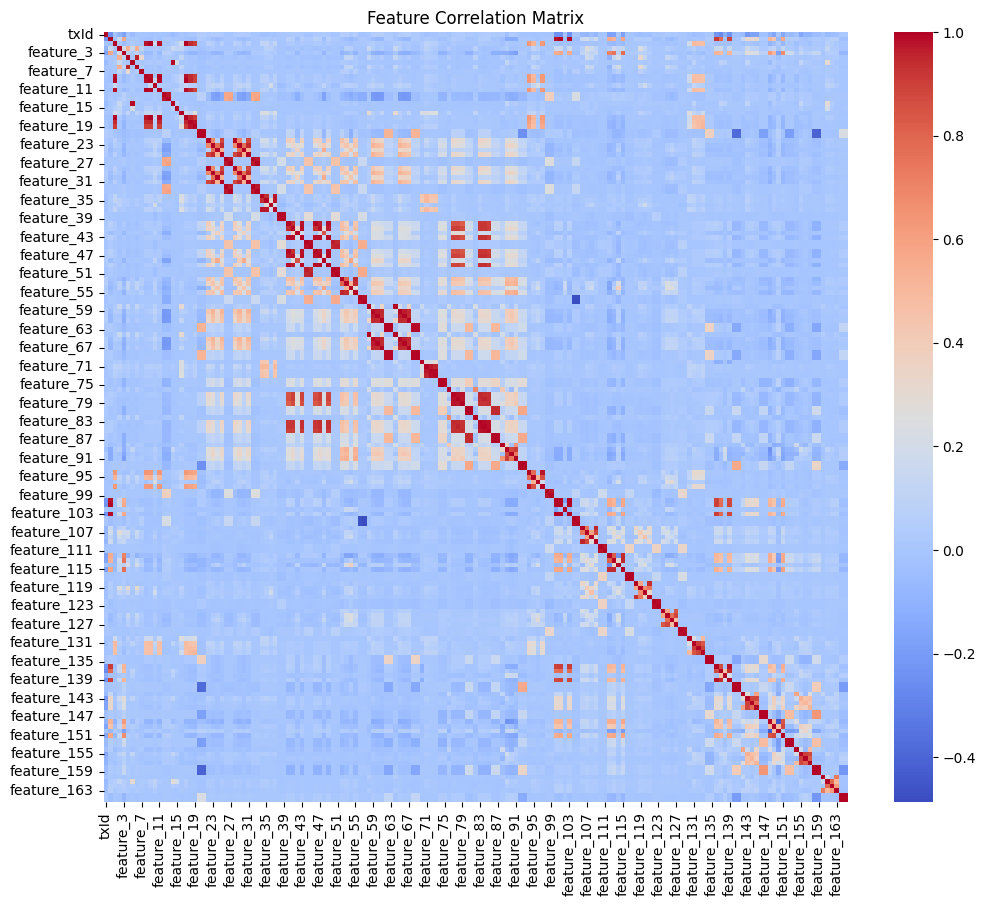

In [ ]:
correlation_matrix = features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


# EDA
## Data visualization


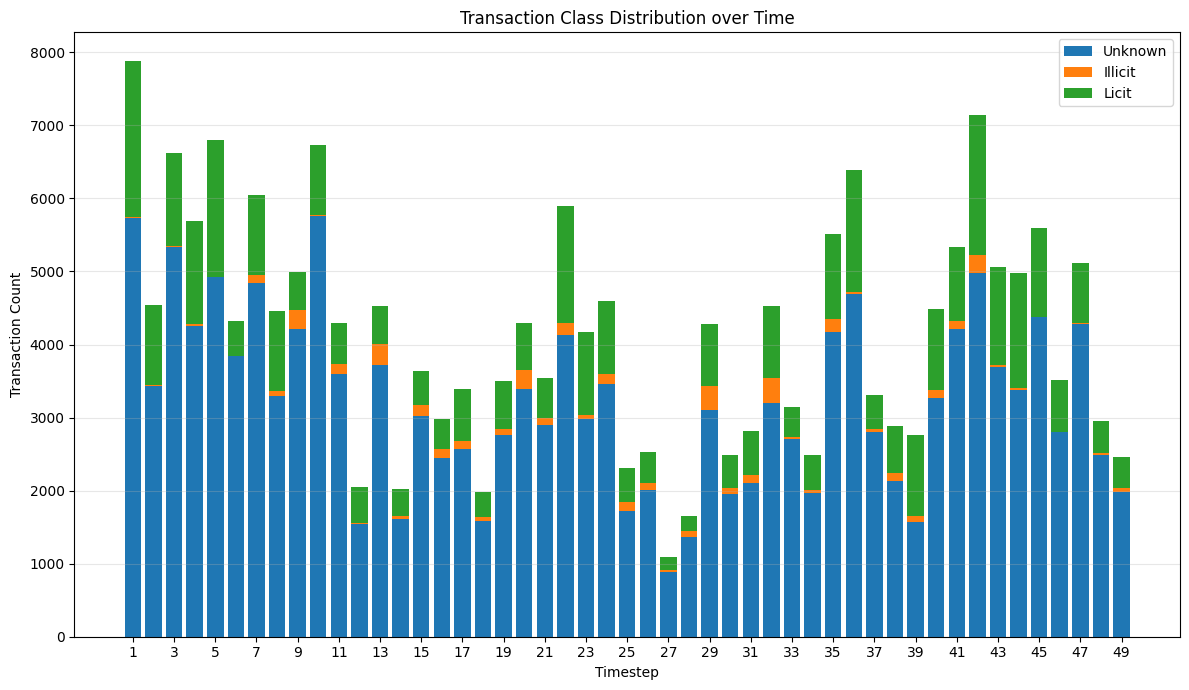

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for analysis
time_class_df = merged_df[['time_step', 'class']]

# Define class constants for clarity and maintainability
UNKNOWN_CLASS = 3
LICIT_CLASS = 2
ILLEGAL_CLASS = 1

# Filter transactions by class type
unknown_transactions = time_class_df[time_class_df['class'] == UNKNOWN_CLASS]
licit_transactions = time_class_df[time_class_df['class'] == LICIT_CLASS]
illicit_transactions = time_class_df[time_class_df['class'] == ILLEGAL_CLASS]

# Count transactions per timestep for each class
# Ensure all timesteps (1-49) are represented, filling missing with 0
timesteps = range(1, 50)
unknown_counts = unknown_transactions['time_step'].value_counts().reindex(timesteps, fill_value=0).sort_index()
licit_counts = licit_transactions['time_step'].value_counts().reindex(timesteps, fill_value=0).sort_index()
illicit_counts = illicit_transactions['time_step'].value_counts().reindex(timesteps, fill_value=0).sort_index()

# Create the stacked bar chart
plt.figure(figsize=(12, 7))
plt.bar(timesteps, unknown_counts, label="Unknown", alpha=1)
plt.bar(timesteps, illicit_counts, bottom=unknown_counts, label="Illicit", alpha=1)
plt.bar(timesteps, licit_counts, bottom=unknown_counts + illicit_counts, label="Licit", alpha=1)

# Formatting
plt.legend()
plt.xlabel("Timestep")
plt.ylabel("Transaction Count")
plt.title("Transaction Class Distribution over Time")
plt.xticks(np.arange(1, 50, 2))  # Show every 2nd timestep to avoid clutter
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig("time_count.png", dpi=300, bbox_inches='tight')
plt.show()

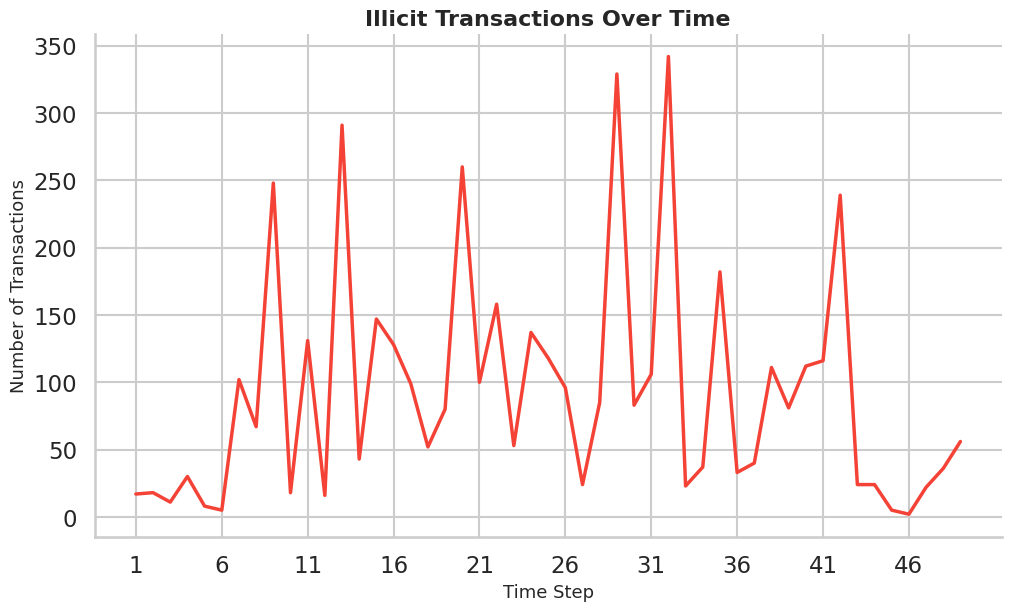

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Configuration ---
sns.set_theme(style="whitegrid", context="talk")

# --- Filter for illicit transactions ---
df_illicit = merged_df[merged_df['class'] == 1]

# --- Count transactions per timestep ---
counts = (
    df_illicit['time_step']
    .value_counts()
    .reset_index(name='count')
    .rename(columns={'index': 'time_step'})
    .sort_values('time_step')
)

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

sns.lineplot(
    data=counts,
    x='time_step',
    y='count',
    ax=ax,
    color="#f44336",  # red tone for illicit
    linewidth=2.5,
)

sns.despine(fig=fig, ax=ax)
ax.set_title("Illicit Transactions Over Time", fontsize=16, weight='bold')
ax.set_xlabel("Time Step", fontsize=13)
ax.set_ylabel("Number of Transactions", fontsize=13)

plt.xticks(np.arange(1, 50, 5))  # Show every 2nd timestep to avoid clutter

plt.show()


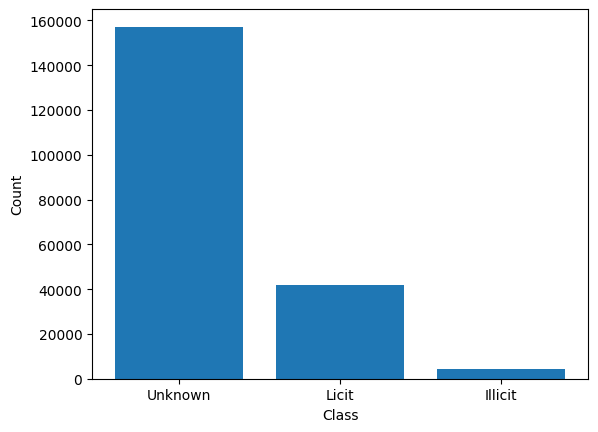

In [2]:
classes = merged_df['class'].value_counts()
plt.bar(['Unknown', 'Licit', 'Illicit'],classes)
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig("actual_class.png")

#  Separate unknown and known instances

In [ ]:

# Separate known instances
df_class_k = merged_df[merged_df['class'] != 3]


# Create filter: which features belong to known transactions?
known_tx_mask = merged_df['txId'].isin(df_class_k["txId"])

# Keep only features for known transactions
df_features_new = merged_df[known_tx_mask]
df_features_new.head()


,txId,time_step,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,class
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
9,232029206,1,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,2
10,232344069,1,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
11,27553029,1,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,2
16,3881097,1,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,2


# Classifiers: SVM, Random Forest, and Adaboost

Accuracy: 0.987973800064426
F1 (weighted): 0.9878589944346976

Classification report:
               precision    recall  f1-score   support

           1     0.9575    0.9175    0.9371       909
           2     0.9911    0.9956    0.9934      8404

    accuracy                         0.9880      9313
   macro avg     0.9743    0.9565    0.9652      9313
weighted avg     0.9878    0.9880    0.9879      9313




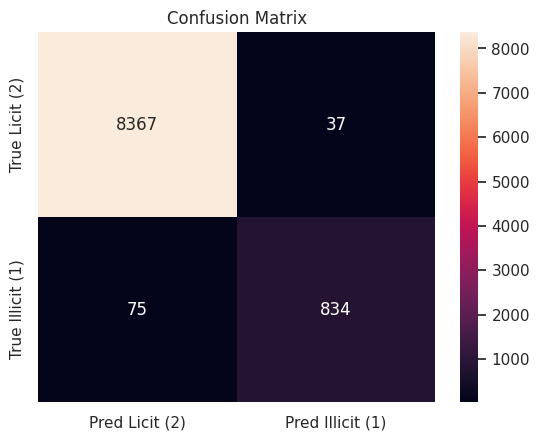

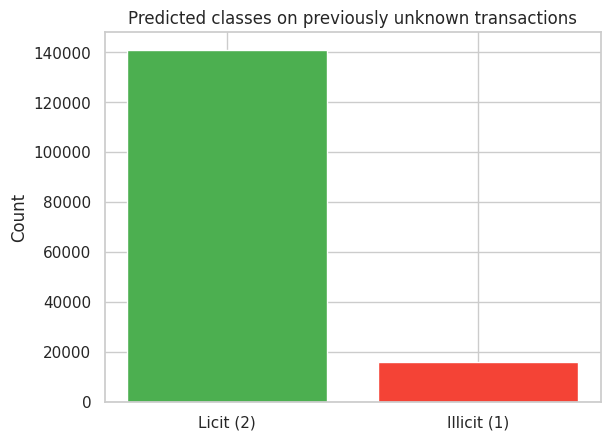

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

sns.set_theme(style='whitegrid')

# --- 1) Split known / unknown ---
df_known = merged_df[merged_df['class'] != 3].copy()
df_unknown = merged_df[merged_df['class'] == 3].copy() # unknowns

# --- 2) Prepare features and labels ---
feature_cols = [c for c in merged_df.columns if c.startswith('feature_')]
X = df_known[feature_cols]
y = df_known['class'].astype(int)

# --- 3) Train-test split (stratified for class balance) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 4) Build pipeline (scaling + classifier) ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        random_state=42, class_weight='balanced', n_estimators=200, max_depth=10))
])

# --- 5) Train and evaluate ---
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 (weighted):", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print()





cm = confusion_matrix(y_test, y_pred, labels=[2,1])
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Pred Licit (2)', 'Pred Illicit (1)'],
            yticklabels=['True Licit (2)', 'True Illicit (1)'])
plt.title("Confusion Matrix")
plt.show()

# --- 6) Predict unknown transactions ---
X_unknown = df_unknown[feature_cols]
unknown_pred = pipeline.predict(X_unknown)

# --- 7) Count and plot results ---
licit_count = np.count_nonzero(unknown_pred == 2)
illicit_count = np.count_nonzero(unknown_pred == 1)

plt.bar(["Licit (2)", "Illicit (1)"], [licit_count, illicit_count], color=['#4caf50','#f44336'])
plt.ylabel("Count")
plt.title("Predicted classes on previously unknown transactions")
plt.show()


In [ ]:
# --- Check class order ---
print("Class order in predict_proba:", pipeline.classes_)

# --- Probabilities ---
proba = pipeline.predict_proba(X_test)
if pipeline.classes_[0] == 1:
    y_prob_illicit = proba[:, 0]
else:
    y_prob_illicit = proba[:, 1]

from sklearn.metrics import roc_auc_score, average_precision_score
roc_auc = roc_auc_score((y_test == 1), y_prob_illicit)
pr_auc  = average_precision_score((y_test == 1), y_prob_illicit)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f}")


Class order in predict_proba: [1 2]
ROC-AUC: 0.9953
PR-AUC : 0.9762


Accuracy: 0.9547943734564587
F1 (weighted): 0.9574359821494369

Classification report:
               precision    recall  f1-score   support

           1     0.7050    0.9230    0.7994       909
           2     0.9914    0.9582    0.9745      8404

    accuracy                         0.9548      9313
   macro avg     0.8482    0.9406    0.8870      9313
weighted avg     0.9634    0.9548    0.9574      9313




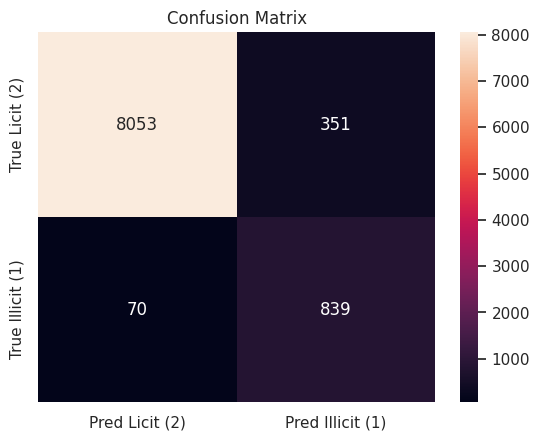

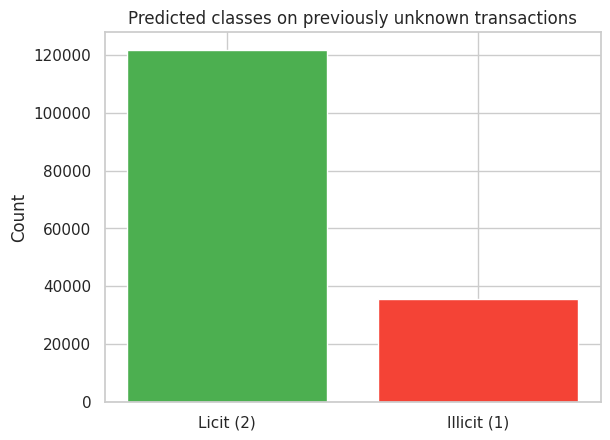

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

sns.set_theme(style='whitegrid')

# --- 1) Split known / unknown ---
df_known = merged_df[merged_df['class'] != 3].copy()
df_unknown = merged_df[merged_df['class'] == 3].copy() # unknowns

# --- 2) Prepare features and labels ---
feature_cols = [c for c in merged_df.columns if c.startswith('feature_')]
X = df_known[feature_cols]
y = df_known['class'].astype(int)

# --- 3) Train-test split (stratified for class balance) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- 4) Build pipeline (scaling + classifier) ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(
        kernel='rbf', random_state=42, class_weight='balanced'))
])

# --- 5) Train and evaluate ---
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 (weighted):", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print()

cm = confusion_matrix(y_test, y_pred, labels=[2,1])
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Pred Licit (2)', 'Pred Illicit (1)'],
            yticklabels=['True Licit (2)', 'True Illicit (1)'])
plt.title("Confusion Matrix")
plt.show()

# --- 6) Predict unknown transactions ---
X_unknown = df_unknown[feature_cols]
unknown_pred = pipeline.predict(X_unknown)

# --- 7) Count and plot results ---
licit_count = np.count_nonzero(unknown_pred == 2)
illicit_count = np.count_nonzero(unknown_pred == 1)

plt.bar(["Licit (2)", "Illicit (1)"], [licit_count, illicit_count], color=['#4caf50','#f44336'])
plt.ylabel("Count")
plt.title("Predicted classes on previously unknown transactions")
plt.show()

# Graphs and Deepwalk

In [ ]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git


Looking in links: https://data.pyg.org/whl/torch-2.8.0+cu126.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 42.9 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.8.0+cu126.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 125.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.8.0+cu126.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.7 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-ifnqxgbg
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-ifnqxgbg
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 76ff9c2ce18c8cebf52122b57e2aeadce9793d10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.7.0-py3-none-any.whl size=1

In [ ]:
#give different score every time. fix it
import pandas as pd
import torch
from torch.nn import Embedding
from torch_geometric.data import Data
from torch_geometric.nn import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import numpy as np

# --- Load data ---
features = pd.read_csv('/content/drive/MyDrive/anomaly_detection/elliptic_txs_features.csv', header=None)
edges = pd.read_csv('/content/drive/MyDrive/anomaly_detection/elliptic_txs_edgelist.csv')
classes = pd.read_csv('/content/drive/MyDrive/anomaly_detection/elliptic_txs_classes.csv')

# --- Preprocess classes for Elliptic ---
# Keep only known classes (remove 'unknown')
classes = classes[classes['class'] != 'unknown'].copy()
classes['class'] = classes['class'].astype(int)


# --- Align with features ---
valid_nodes = classes['txId'].values
features = features[features[0].isin(valid_nodes)]
node_ids = features[0].values
node_id_map = {id_: i for i, id_ in enumerate(node_ids)}

# --- Build graph ---
edges = edges[edges['txId1'].isin(node_id_map) & edges['txId2'].isin(node_id_map)]
edge_index = torch.tensor(
    [[node_id_map[src], node_id_map[dst]] for src, dst in zip(edges['txId1'], edges['txId2'])],
    dtype=torch.long
).t().contiguous()

x = torch.tensor(features.iloc[:, 1:].values, dtype=torch.float)
y = torch.tensor(classes.set_index('txId').loc[node_ids, 'class'].values, dtype=torch.long)

print(f"Total labeled nodes: {len(y)}")
print("Label distribution:", np.bincount(y.numpy()))

# --- Split ---
node_indices = np.arange(len(y))
train_idx, temp_idx = train_test_split(node_indices, test_size=0.4, random_state=42, stratify=y)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, random_state=42, stratify=y[temp_idx])

y_train, y_val, y_test = y[train_idx].numpy(), y[val_idx].numpy(), y[test_idx].numpy()

# --- Train Node2Vec on full graph ---
device = 'cuda' if torch.cuda.is_available() else 'cpu'
node2vec = Node2Vec(
    edge_index=edge_index,
    embedding_dim=128,
    walk_length=20,
    context_size=10,
    walks_per_node=10,
    num_negative_samples=1,
    p=1,
    q=1,
    sparse=True
).to(device)

loader = node2vec.loader(batch_size=128, shuffle=True, num_workers=2)
optimizer = torch.optim.SparseAdam(list(node2vec.parameters()), lr=0.01)

print("Training Node2Vec...")
for epoch in range(1, 6):
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = node2vec.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# Get Node2Vec embeddings
embeddings = node2vec.embedding.weight.detach().cpu().numpy()

# Get original features (already aligned to node_ids, exclude txId column)
original_features = features.iloc[:, 1:].values  # shape: (n_nodes, n_features)

# ✅ Combine embeddings + original features
X_combined = np.concatenate([embeddings, original_features], axis=1)

# Split combined features
X_train = X_combined[train_idx]
X_val = X_combined[val_idx]
X_test = X_combined[test_idx]

# --- Train classifier ---
clf = RandomForestClassifier(n_estimators=500, random_state=42, class_weight={1: 5, 2: 1},  max_depth=15)
clf.fit(X_train, y_train)

# --- Safe reporting ---
def safe_report(y_true, y_pred):
    labels = unique_labels(y_true, y_pred)
    names = ['Licit' if l == 2 else 'Illicit' for l in labels]
    return classification_report(y_true, y_pred, labels=labels, target_names=names, digits=4, zero_division=0)


val_pred = clf.predict(X_val)
test_pred = clf.predict(X_test)

print("\n=== VALIDATION ===")
print(safe_report(y_val, val_pred))
print("\n=== TEST ===")
print(safe_report(y_test, test_pred))


Total labeled nodes: 46564
Label distribution: [    0  4545 42019]
Training Node2Vec...
Epoch 1, Loss: 1582.9328
Epoch 2, Loss: 757.6426
Epoch 3, Loss: 450.4394
Epoch 4, Loss: 343.4159
Epoch 5, Loss: 309.0686

=== VALIDATION ===
              precision    recall  f1-score   support

     Illicit     0.9937    0.8614    0.9228       909
       Licit     0.9852    0.9994    0.9923      8404

    accuracy                         0.9859      9313
   macro avg     0.9894    0.9304    0.9575      9313
weighted avg     0.9860    0.9859    0.9855      9313


=== TEST ===
              precision    recall  f1-score   support

     Illicit     0.9950    0.8724    0.9297       909
       Licit     0.9864    0.9995    0.9929      8404

    accuracy                         0.9871      9313
   macro avg     0.9907    0.9360    0.9613      9313
weighted avg     0.9872    0.9871    0.9867      9313



In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

# --- Safe reporting ---
def safe_report(y_true, y_pred, y_prob=None):
    labels = unique_labels(y_true, y_pred)
    names = ['Licit' if l == 2 else 'Illicit' for l in labels]
    print(classification_report(y_true, y_pred, labels=labels,
                                target_names=names, digits=4, zero_division=0))

    if y_prob is not None:
        # Probability of "Illicit" (class=1)
        illicit_index = np.where(np.array(labels) == 1)[0]
        if illicit_index.size > 0:
            prob_illicit = y_prob[:, illicit_index[0]]
            roc_auc = roc_auc_score(y_true == 1, prob_illicit)
            pr_auc = average_precision_score(y_true == 1, prob_illicit)
            print(f"ROC-AUC: {roc_auc:.4f}")
            print(f"PR-AUC : {pr_auc:.4f}")

# --- Predictions ---
val_pred = clf.predict(X_val)
test_pred = clf.predict(X_test)

# --- Probabilities ---
if hasattr(clf, "predict_proba"):
    val_prob = clf.predict_proba(X_val)
    test_prob = clf.predict_proba(X_test)
else:
    # For models like SVM without predict_proba
    val_prob = None
    test_prob = None

# --- Reports ---
print("\n=== VALIDATION ===")
safe_report(y_val, val_pred, val_prob)

print("\n=== TEST ===")
safe_report(y_test, test_pred, test_prob)



=== VALIDATION ===
              precision    recall  f1-score   support

     Illicit     0.9937    0.8614    0.9228       909
       Licit     0.9852    0.9994    0.9923      8404

    accuracy                         0.9859      9313
   macro avg     0.9894    0.9304    0.9575      9313
weighted avg     0.9860    0.9859    0.9855      9313

ROC-AUC: 0.9953
PR-AUC : 0.9749

=== TEST ===
              precision    recall  f1-score   support

     Illicit     0.9950    0.8724    0.9297       909
       Licit     0.9864    0.9995    0.9929      8404

    accuracy                         0.9871      9313
   macro avg     0.9907    0.9360    0.9613      9313
weighted avg     0.9872    0.9871    0.9867      9313

ROC-AUC: 0.9951
PR-AUC : 0.9783


In [ ]:
import numpy as np
print(np.unique(test_pred, return_counts=True))


(array([1, 2]), array([ 797, 8516]))


# Results table for existing models

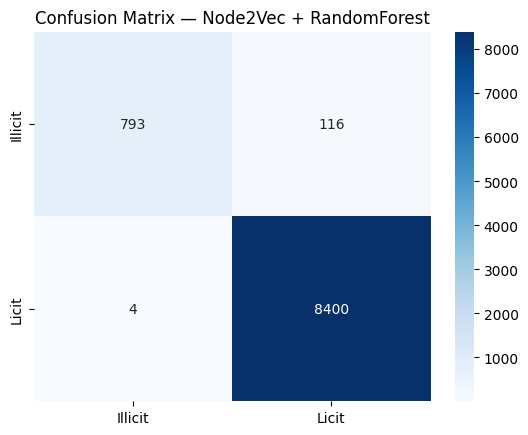

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, test_pred, labels=[1,2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Illicit','Licit'],
            yticklabels=['Illicit','Licit'])
plt.title("Confusion Matrix — Node2Vec + RandomForest")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

results = {
    "Model": ["RandomForest", "SVM", "Node2Vec + RF", "GraphSAGE", "tuned GraphSAGE"],
    "Accuracy": [0.9880, 0.9548, 0.9870, 0.9671, 0.9656],
    "F1-score (Illicit)": [0.9371, 0.7994, 0.9290, 0.7037, 0.7099],
    "Precision (Illicit)": [0.9575, 0.7050, 0.9950, 0.8468, 0.7859],
    "Recall (Illicit)": [0.9175, 0.9230, 0.8713, 0.6020, 0.6473],
    "PR-AUC": [0.9762, np.nan, 0.9794, 0.3739 , 0.6811],
    "ROC-AUC": [0.9953, np.nan, 0.9956, 0.8854, 0.9008]
}

df_results = pd.DataFrame(results)


from google.colab import data_table
data_table.DataTable(df_results)

,Model,Accuracy,F1-score (Illicit),Precision (Illicit),Recall (Illicit),PR-AUC,ROC-AUC
0,RandomForest,0.9880,0.9371,0.9575,0.9175,0.9762,0.9953
1,SVM,0.9548,0.7994,0.7050,0.9230,NaN,NaN
2,Node2Vec + RF,0.9870,0.9290,0.9950,0.8713,0.9794,0.9956
3,GraphSAGE,0.9671,0.7037,0.8468,0.6020,0.3739,0.8854
4,tuned GraphSAGE,0.9656,0.7099,0.7859,0.6473,0.6811,0.9008


             Model  Accuracy  F1-score (Illicit)  Precision (Illicit)  \
0     RandomForest    0.9880              0.9371               0.9575   
1              SVM    0.9548              0.7994               0.7050   
2    Node2Vec + RF    0.9870              0.9290               0.9950   
3        GraphSAGE    0.9671              0.7037               0.8468   
4  tuned GraphSAGE    0.9656              0.7099               0.7859   

   Recall (Illicit)  PR-AUC  ROC-AUC  
0            0.9175  0.9762   0.9953  
1            0.9230     NaN      NaN  
2            0.8713  0.9794   0.9956  
3            0.6020  0.3739   0.8854  
4            0.6473  0.6811   0.9008  


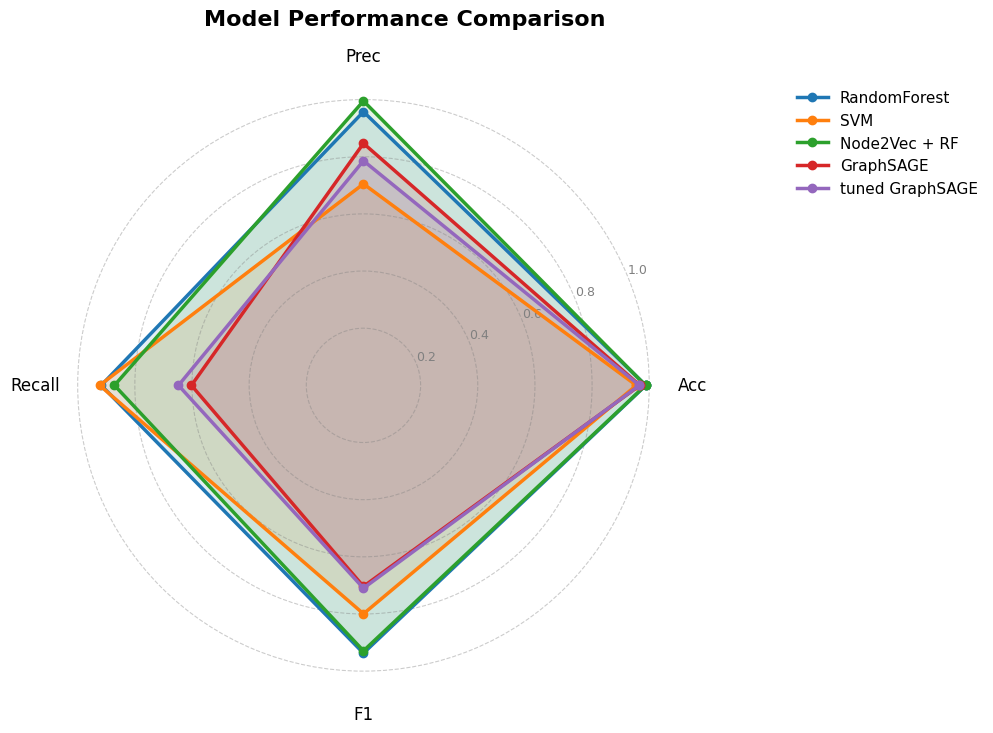

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


results = {
    "Model": ["RandomForest", "SVM", "Node2Vec + RF", "GraphSAGE", "tuned GraphSAGE"],
    "Accuracy": [0.9880, 0.9548, 0.9870, 0.9671, 0.9656],
    "F1-score (Illicit)": [0.9371, 0.7994, 0.9290, 0.7037, 0.7099],
    "Precision (Illicit)": [0.9575, 0.7050, 0.9950, 0.8468, 0.7859],
    "Recall (Illicit)": [0.9175, 0.9230, 0.8713, 0.6020, 0.6473],
    "PR-AUC": [0.9762, np.nan, 0.9794, 0.3739 , 0.6811],
    "ROC-AUC": [0.9953, np.nan, 0.9956, 0.8854, 0.9008]
}

df_results = pd.DataFrame(results)
print(df_results)

import numpy as np
import matplotlib.pyplot as plt

# Short labels (horizontal, no rotation)
short_labels = ["Acc", "Prec", "Recall", "F1"]
num_vars = len(short_labels)

# Compute angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Create plot
fig, ax = plt.subplots(figsize=(8, 7.5), subplot_kw=dict(polar=True))

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


# Plot each model
for i, (idx, row) in enumerate(df_results.iterrows()):
    values = [
        row["Accuracy"],
        row["Precision (Illicit)"],
        row["Recall (Illicit)"],
        row["F1-score (Illicit)"]
    ]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2.5, label=row['Model'], color=colors[i], markersize=6)
    ax.fill(angles, values, alpha=0.12, color=colors[i])

# === Fix clipping: extend radius slightly ===
ax.set_ylim(0, 1.08)  # ← Key: 8% padding beyond 1.0

# Y-ticks only up to 1.0 (visually, 1.0 is still the "max")
yticks = [0.2, 0.4, 0.6, 0.8, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{y:.1f}" for y in yticks], color='gray', fontsize=9)
ax.grid(True, linestyle='--', alpha=0.4, color='gray')

# Hide default angular ticks
ax.set_xticks([])

# Remove outer spine
ax.spines['polar'].set_visible(False)

# === Place labels outside the padded circle ===
label_radius = 1.15  # safely outside markers

for i, label in enumerate(short_labels):
    angle_rad = angles[i]
    ax.text(
        angle_rad,
        label_radius,
        label,
        ha='center',
        va='center',
        fontsize=12,
        fontweight='medium'
    )

# === Title ===
fig.suptitle(
    "Model Performance Comparison",
    fontsize=16,
    fontweight='bold',
    x=0.5,
    y=0.97,
    ha='center'
)

# === Legend ===
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.18, 1.0),
    frameon=False,
    fontsize=11
)

# Final layout
plt.tight_layout()
plt.subplots_adjust(top=0.88, right=0.85)
plt.show()

In [ ]:
print("Number of features in model:", clf.n_features_in_)
# Should be 293 (128 + 165)

Number of features in model: 294


<Figure size 1000x800 with 0 Axes>

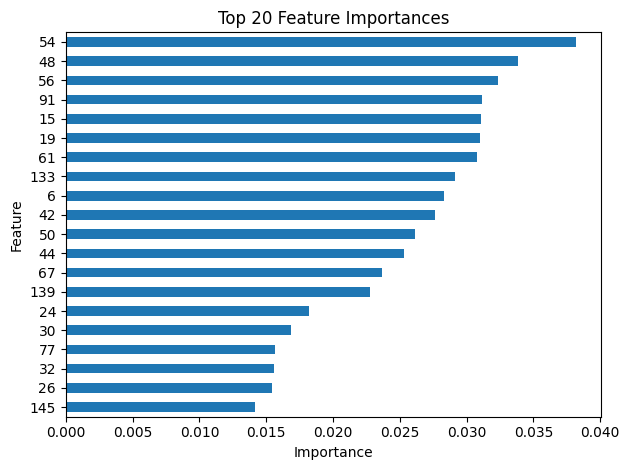

In [ ]:
# After combining embeddings + features:
n_embed = embeddings.shape[1]  # e.g., 128
n_orig = features.shape[1] - 1  # exclude txId

# Create meaningful column names
embed_cols = [f"emb_{i}" for i in range(n_embed)]
orig_cols = features.columns[1:].tolist()  # real Elliptic feature names!
all_cols = embed_cols + orig_cols

# Convert to DataFrame
X_combined_df = pd.DataFrame(X_combined, columns=all_cols)

# Now split using .iloc (since train_idx are integer positions)
X_train = X_combined_df.iloc[train_idx]
X_val = X_combined_df.iloc[val_idx]
X_test = X_combined_df.iloc[test_idx]
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Imp": clf.feature_importances_  # or cRF.feature_importances_
})
imp_df_sorted = imp_df.sort_values(by="Imp", ascending=False)

plt.figure(figsize=(10, 8))
imp_df_sorted.head(20).iloc[::-1].plot(
    kind='barh',
    x='Feature',
    y='Imp',
    color='#1f77b4',
    legend=False
)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
# Load without any extra parameters
df_txs_features = pd.read_csv('/content/drive/MyDrive/anomaly_detection/txs_features.csv')

# Check the first few rows
print("First 2 rows of data:")
print(df_txs_features.head(2))

# Check column names
print("\nColumn names:")
print(list(df_txs_features.columns))

First 2 rows of data:
    txId  Time step  Local_feature_1  Local_feature_2  Local_feature_3  \
0   3321          1        -0.169615        -0.184668        -1.201369   
1  11108          1        -0.137586        -0.184668        -1.201369   

   Local_feature_4  Local_feature_5  Local_feature_6  Local_feature_7  \
0         -0.12197        -0.043875        -0.113002        -0.061584   
1         -0.12197        -0.043875        -0.113002        -0.061584   

   Local_feature_8  ...  in_BTC_min  in_BTC_max  in_BTC_mean  in_BTC_median  \
0        -0.160199  ...    0.534072    0.534072     0.534072       0.534072   
1        -0.127429  ...    5.611878    5.611878     5.611878       5.611878   

   in_BTC_total  out_BTC_min  out_BTC_max  out_BTC_mean  out_BTC_median  \
0      0.534072     0.166899     0.367074      0.266986        0.266986   
1      5.611878     0.586194     5.025584      2.805889        2.805889   

   out_BTC_total  
0       0.533972  
1       5.611778  

[2 rows x 184

Merged shape before cleaning: (203769, 185)
Merged shape after removing 'unknown': (46564, 185)
Class distribution: (array([1, 2]), array([ 4545, 42019]))


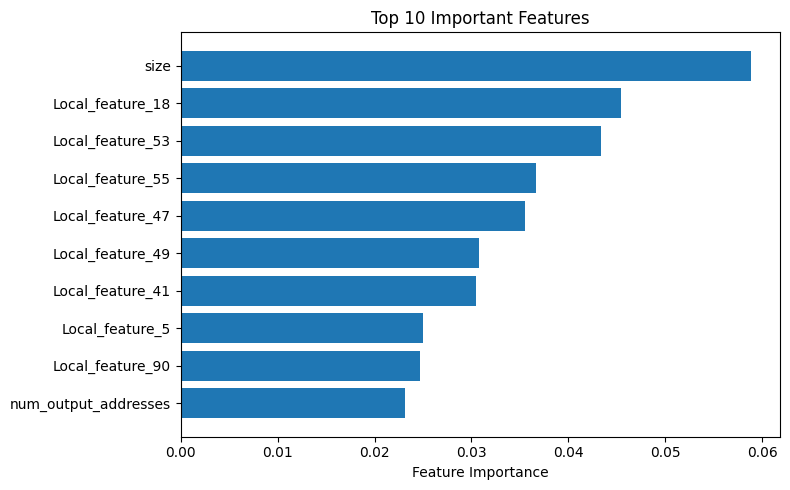

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# --- 1. Load data ---
df_features = pd.read_csv('/content/drive/MyDrive/anomaly_detection/txs_features.csv')
df_classes = pd.read_csv('/content/drive/MyDrive/anomaly_detection/elliptic_txs_classes.csv',
                         names=['txId', 'class'])

# --- 2. Ensure 'txId' is string ---
df_features['txId'] = df_features['txId'].astype(str)
df_classes['txId'] = df_classes['txId'].astype(str)

# --- 3. Merge ---
merged_df = pd.merge(df_features, df_classes, on='txId')
print(f"Merged shape before cleaning: {merged_df.shape}")

# --- 4. Clean column names ---
merged_df.columns = merged_df.columns.str.strip()

# --- 5. Remove 'unknown' class rows ---
merged_df = merged_df[merged_df['class'] != 'unknown']
print(f"Merged shape after removing 'unknown': {merged_df.shape}")

# --- 6. Prepare X and y ---
feature_cols = merged_df.columns.drop(['txId', 'Time step', 'class'])
X = merged_df[feature_cols].values
y = merged_df['class'].astype(int).values  # now safe!

# --- 7. Optional: Check class distribution ---
print("Class distribution:", np.unique(y, return_counts=True))

# --- 8. Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 9. Train model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 10. Feature importances & plot ---
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = [feature_cols[i] for i in indices[:10]]

plt.figure(figsize=(8, 5))
plt.barh(top_features[::-1], importances[indices[:10]][::-1])
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

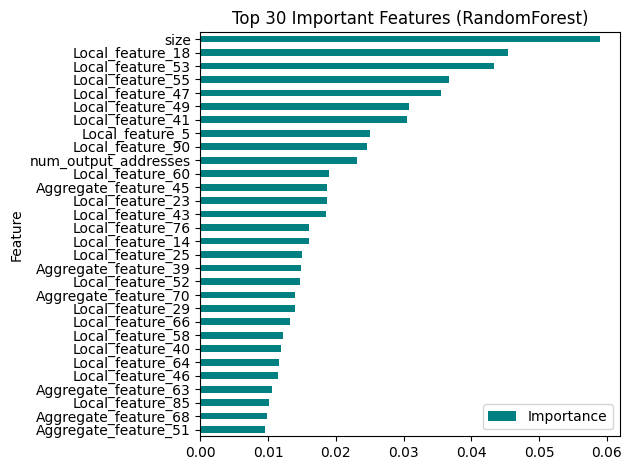

In [ ]:
# After training your model
importances = model.feature_importances_
imp_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
imp_df.head(30).iloc[::-1].plot(kind='barh', x='Feature', y='Importance', color='teal')
plt.title("Top 30 Important Features (RandomForest)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Recreate imp_df_sorted from your model and feature_cols
imp_df = pd.DataFrame({
    'Feature': feature_cols,
    'Imp': model.feature_importances_
})
imp_df_sorted = imp_df.sort_values('Imp', ascending=False)

# Plot least important 20
plt.figure(figsize=(10, 8))
imp_df_sorted.tail(20).iloc[::-1].plot(kind='barh', y='Imp', x='Feature', color='r')
plt.title("Least Important 20 Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
# 1. Make sure you still have the original list of feature names in order
#    This should be the same list you used when creating X (before train_test_split)
#    Example: feature_cols = ['tx_count', 'total_btc_sent', 'avg_amount', ...]

# If you don't have it saved, recreate it from your original dataframe:
# feature_cols = df.drop(columns=['label']).columns.tolist()  # or however you defined it

# 2. Create a mapping from feature name → column index
feature_to_index = {feat: idx for idx, feat in enumerate(feature_cols)}

# 3. Get indices of your top features
top_indices = [feature_to_index[feat] for feat in top_features]

# 4. Select columns from NumPy arrays using these indices
X_train_selected = X_train[:, top_indices]
X_test_selected = X_test[:, top_indices]

# 5. Retrain and evaluate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score

rf_selected = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    random_state=42
)
rf_selected.fit(X_train_selected, y_train)

y_pred = rf_selected.predict(X_test_selected)
print("F1 (selected):", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

# GraphSAGE

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_score, recall_score, accuracy_score

# --- 1. Data Loading and Preprocessing ---

def load_data(features_path, edges_path, classes_path):
    """
    Loads the Elliptic dataset from CSV files.
    """
    print("Loading data...")
    # Load features, assuming headers are present in the new file
    features_df = pd.read_csv(features_path)
    features_df = features_df.fillna(0)


    # Load edges
    edges_df = pd.read_csv(edges_path)

    # Load classes and map them to numeric values
    classes_df = pd.read_csv(classes_path)
    # New mapping: 'unknown': 3, '1' (illicit): 1, '2' (licit): 2
    classes_df['class'] = classes_df['class'].map({'unknown': 3, '1': 1, '2': 2})

    return features_df, edges_df, classes_df

def preprocess_and_create_graph(features_df, edges_df, classes_df):
    """
    Preprocesses the data and constructs a PyTorch Geometric Data object.
    Drops unknown nodes (class=3) entirely.
    """
    print("Preprocessing and constructing graph...")

    # Merge and keep only transactions with known labels (1 or 2)
    combined_df = pd.merge(features_df, classes_df, on='txId', how='inner')
    labeled_df = combined_df[combined_df['class'].isin([1, 2])].copy()

    # Map labels: illicit (1) → 1, licit (2) → 0
    labeled_df['class'] = labeled_df['class'].map({1: 1, 2: 0})

    # Sort by txId
    labeled_df = labeled_df.sort_values('txId').reset_index(drop=True)

    # Create txId → index mapping
    txid_map = {txid: i for i, txid in enumerate(labeled_df['txId'])}

    # --- Node Features ---
    feature_cols = labeled_df.columns.drop(['txId', 'Time step', 'class'])
    node_features = labeled_df[feature_cols].values
    scaler = StandardScaler()
    node_features_scaled = scaler.fit_transform(node_features)
    x = torch.tensor(node_features_scaled, dtype=torch.float)

    # --- Edge Index ---
    # Only keep edges where BOTH nodes are in labeled_df
    # Filter edges and create a clean copy
    # --- Edge Index ---
    # Only keep edges where BOTH nodes are in labeled_df
    valid_edges = edges_df[
        edges_df['txId1'].isin(txid_map) &
        edges_df['txId2'].isin(txid_map)
    ].copy()  # ← CRITICAL: .copy()

    valid_edges['txId1_idx'] = valid_edges['txId1'].map(txid_map)
    valid_edges['txId2_idx'] = valid_edges['txId2'].map(txid_map)

    # Optional: double-check no NaNs
    assert valid_edges['txId1_idx'].notna().all()
    assert valid_edges['txId2_idx'].notna().all()

    edge_index = torch.tensor(valid_edges[['txId1_idx', 'txId2_idx']].values.T, dtype=torch.long)


    # --- Labels ---
    y = torch.tensor(labeled_df['class'].values, dtype=torch.long)

    # --- Train/Test Masks (temporal split) ---
    time_steps = torch.tensor(labeled_df['Time step'].values)
    train_mask = (time_steps <= 34)
    test_mask = (time_steps > 34)

    # --- Create Graph ---
    graph_data = Data(x=x, edge_index=edge_index, y=y)
    graph_data.train_mask = train_mask
    graph_data.test_mask = test_mask

    print("\nGraph construction complete:")
    print(f"  - Nodes: {graph_data.num_nodes:,}")
    print(f"  - Edges: {graph_data.num_edges:,}")
    print(f"  - Labeled for Training: {graph_data.train_mask.sum():,}")
    print(f"  - Labeled for Testing: {graph_data.test_mask.sum():,}\n")

    return graph_data

# --- 2. GraphSAGE Model Definition ---

class GraphSAGEModel(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGEModel, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# --- 3. Training and Evaluation ---
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()



@torch.no_grad()
def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    pred_probs = F.softmax(out, dim=1)
    preds = pred_probs.argmax(dim=1)

    test_preds = preds[data.test_mask].cpu().numpy()
    test_labels = data.y[data.test_mask].cpu().numpy()
    test_probs = pred_probs[data.test_mask][:, 1].cpu().numpy()

    accuracy = accuracy_score(test_labels, test_preds)
    f1 = f1_score(test_labels, test_preds, average='binary')
    precision = precision_score(test_labels, test_preds, average='binary')
    recall = recall_score(test_labels, test_preds, average='binary')
    roc_auc = roc_auc_score(test_labels, test_probs)
    pr_auc = average_precision_score(test_labels, test_probs)

    return {
        "accuracy": accuracy,
        "f1_score": f1,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc
    }

# --- 4. Main Execution ---

if __name__ == '__main__':
    # Define file paths (update these to your local paths)
    features_path = '/content/drive/MyDrive/anomaly/txs_features.csv'
    edges_path = '/content/drive/MyDrive/anomaly/elliptic_txs_edgelist.csv'
    classes_path = '/content/drive/MyDrive/anomaly/elliptic_txs_classes.csv'

    # Load and process data
    features_df, edges_df, classes_df = load_data(features_path, edges_path, classes_path)
    graph_data = preprocess_and_create_graph(features_df, edges_df, classes_df)

    # Setup device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}\n")
    print("Checking graph data before sending to GPU...")

    print("Unique labels:", graph_data.y.unique())
    print("Max edge index:", graph_data.edge_index.max().item())
    print("Number of nodes:", graph_data.num_nodes)

    assert graph_data.y.min() >= 0, "❌ Found negative labels!"
    assert graph_data.y.max() < 2, "❌ Found labels >= 2 (bad label mapping)"
    assert graph_data.edge_index.max() < graph_data.num_nodes, "❌ Edge index out of range!"

    print("✅ Graph data looks valid.")

    graph_data = graph_data.to(device)

    # Model parameters
    num_node_features = graph_data.num_node_features
    # Licit (class 0) and Illicit (class 1)
    num_classes = 2
    hidden_dim = 128

    # Instantiate model, optimizer, and loss function
    model = GraphSAGEModel(
        in_channels=num_node_features,
        hidden_channels=hidden_dim,
        out_channels=num_classes
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    criterion = torch.nn.CrossEntropyLoss()

    # Training loop
    epochs = 200
    print("Starting training...")
    for epoch in range(1, epochs + 1):
        loss = train(model, graph_data, optimizer, criterion)
        if epoch % 10 == 0:
            metrics = test(model, graph_data)
            print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, "
                  f"Test Accuracy: {metrics['accuracy']:.4f}, "
                  f"Test F1: {metrics['f1_score']:.4f}")

    # Final evaluation
    print("\nTraining finished. Final evaluation on the test set:")
    final_metrics = test(model, graph_data)
    for metric, value in final_metrics.items():
        print(f"  - {metric.replace('_', ' ').title()}: {value:.4f}")




ModuleNotFoundError: No module named 'torch_geometric'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

# --- Permutation Feature Importance for GraphSAGE ---
def permutation_importance(model, data, metric='f1_score', device='cpu'):
    # map short names if needed
    metric_map = {'f1': 'f1_score', 'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}
    metric_key = metric_map.get(metric, metric)

    model.eval()
    data = data.to(device)

    baseline_metrics = test(model, data)
    baseline_score = baseline_metrics[metric_key]
    print(f"Baseline {metric_key}: {baseline_score:.4f}")

    x_orig = data.x.clone()
    importances = []

    for i in range(x_orig.shape[1]):
        x_perm = x_orig.clone()
        idx = torch.randperm(x_perm.shape[0])
        x_perm[:, i] = x_perm[idx, i]
        data_perm = Data(x=x_perm, edge_index=data.edge_index, y=data.y,
                         train_mask=data.train_mask, test_mask=data.test_mask)
        data_perm = data_perm.to(device)
        perm_metric = test(model, data_perm)[metric_key]
        importances.append(baseline_score - perm_metric)

    return np.array(importances)


# --- Run permutation importance ---
feature_cols = features_df.columns.drop(['txId', 'Time step'])
importances = permutation_importance(model, graph_data, metric='f1', device=device)

# --- Create DataFrame for plotting ---
imp_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# --- Plot Top 30 Features ---
plt.figure(figsize=(10, 8))
imp_df.head(30).iloc[::-1].plot(kind='barh', x='Feature', y='Importance', color='teal')
plt.title("Top 30 Important Features (Permutation Importance)")
plt.tight_layout()
plt.show()

# --- Plot Least 30 Features ---
plt.figure(figsize=(10, 8))
imp_df.tail(30).iloc[::-1].plot(kind='barh', x='Feature', y='Importance', color='coral')
plt.title("Least 30 Important Features (Permutation Importance)")
plt.tight_layout()
plt.show()


In [ ]:
# --- 1️⃣ Select Top Features ---
top_k = 50  # choose how many top features to keep
imp_df_sorted = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

top_features = imp_df_sorted.head(top_k)['Feature'].tolist()
print(f"Selected top {top_k} features:\n", top_features)

# --- 2️⃣ Recreate Graph Data with only top features ---
feature_indices = [i for i, col in enumerate(features_df.columns) if col in top_features]

# Update node features
x_top = graph_data.x[:, feature_indices].clone()

graph_data_top = Data(
    x=x_top,
    edge_index=graph_data.edge_index,
    y=graph_data.y,
    train_mask=graph_data.train_mask,
    test_mask=graph_data.test_mask
).to(device)

print(f"Graph with top {top_k} features:")
print(f"  - Nodes: {graph_data_top.num_nodes}")
print(f"  - Edges: {graph_data_top.num_edges}")
print(f"  - Node feature dimension: {graph_data_top.num_node_features}")

# --- 3️⃣ Redefine GraphSAGE model ---
num_node_features = graph_data_top.num_node_features
hidden_dim = 128
num_classes = 2

model_top = GraphSAGEModel(
    in_channels=num_node_features,
    hidden_channels=hidden_dim,
    out_channels=num_classes
).to(device)

optimizer_top = torch.optim.Adam(model_top.parameters(), lr=0.01, weight_decay=5e-4)

# Optional: class weights if imbalance exists
class_counts = torch.bincount(graph_data_top.y[graph_data_top.train_mask])
weights = 1.0 / class_counts.float()
weights = weights.to(device)
criterion_top = torch.nn.CrossEntropyLoss(weight=weights)

# --- 4️⃣ Retrain GraphSAGE on top features ---
epochs = 200
for epoch in range(1, epochs + 1):
    loss = train(model_top, graph_data_top, optimizer_top, criterion_top)
    if epoch % 10 == 0:
        metrics = test(model_top, graph_data_top)
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, "
              f"Test F1: {metrics['f1_score']:.4f}, ROC-AUC: {metrics['roc_auc']:.4f}")

# --- 5️⃣ Final Evaluation ---
final_metrics = test(model_top, graph_data_top)
print("\nFinal evaluation with top features:")
for metric, value in final_metrics.items():
    print(f"  - {metric.replace('_', ' ').title()}: {value:.4f}")


In [ ]:
import time
import pandas as pd # Already imported, but good practice for a new cell

print("\n--- Experiment 2: Improving Performance ---")
print("Starting systematic model improvement...")

# --- 1. The Key Improvement: Class Weighting ---
# The dataset is highly imbalanced. We must calculate weights for the
# loss function to make it pay more attention to the rare 'illicit' class.

try:
    if 'graph_data' not in locals() or 'device' not in locals():
         raise NameError("Data not loaded")

    print(f"\nUsing pre-loaded graph_data on device: {device}")

    # Calculate weights ONLY on the training data
    train_labels = graph_data.y[graph_data.train_mask]
    class_counts = torch.bincount(train_labels)

    # Weight = total_samples / (num_classes * class_count)
    class_weights = class_counts.sum() / (2.0 * class_counts)
    class_weights = class_weights.to(device) # Send weights to GPU

    print(f"Training Class Counts (0=Licit, 1=Illicit): {class_counts.cpu().numpy()}")
    print(f"Calculated Class Weights: {class_weights.cpu().numpy()}")

except NameError:
    print("\n--- ERROR ---")
    print("Please run the first code cell to load 'graph_data' and 'device' before running this cell.")
    # This cell will stop here if data isn't loaded


# --- 2. Tunable Model Definition ---
# We redefine the model here to easily pass the dropout rate as a parameter
class TunableGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout_p=0.5):
        super(TunableGraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)
        self.dropout_p = dropout_p

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        # Use the parameterized dropout rate
        x = F.dropout(x, p=self.dropout_p, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# --- 3. Re-define train/test functions ---
# We copy them here so this cell is self-contained
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    pred_probs = F.softmax(out, dim=1)
    preds = pred_probs.argmax(dim=1)

    test_preds = preds[data.test_mask].cpu().numpy()
    test_labels = data.y[data.test_mask].cpu().numpy()
    test_probs = pred_probs[data.test_mask][:, 1].cpu().numpy()

    return {
        "accuracy": accuracy_score(test_labels, test_preds),
        "f1_score": f1_score(test_labels, test_preds, average='binary'),
        "precision": precision_score(test_labels, test_preds, average='binary', zero_division=0),
        "recall": recall_score(test_labels, test_preds, average='binary', zero_division=0),
        "roc_auc": roc_auc_score(test_labels, test_probs),
        "pr_auc": average_precision_score(test_labels, test_probs)
    }

# --- 4. Hyperparameter Grid Search ---

# Define the grid of parameters to try
param_grid = {
    'hidden_dim': [64, 128, 256],
    'lr': [0.005, 0.001],
    'dropout_p': [0.4, 0.5]
}

epochs = 200 # Using the same number of epochs for a fair comparison
best_f1 = -1
best_metrics = {}
best_params = {}
results_log = []

print(f"\n--- Starting Grid Search (Total runs: {len(param_grid['hidden_dim']) * len(param_grid['lr']) * len(param_grid['dropout_p'])}) ---")
start_time = time.time()

# Loop through every combination of parameters
for hd in param_grid['hidden_dim']:
    for lr in param_grid['lr']:
        for dp in param_grid['dropout_p']:

            current_params = {'hidden_dim': hd, 'lr': lr, 'dropout_p': dp}
            print(f"\nTesting params: {current_params}")

            # 1. Instantiate model with current params
            model = TunableGraphSAGE(
                in_channels=graph_data.num_node_features,
                hidden_channels=hd,
                out_channels=2, # num_classes
                dropout_p=dp
            ).to(device)

            # 2. Instantiate optimizer with current LR
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)

            # 3. Instantiate loss WITH THE CLASS WEIGHTS
            criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

            # Run the full training loop
            for epoch in range(1, epochs + 1):
                loss = train(model, graph_data, optimizer, criterion)

            # Evaluate the final model
            final_metrics = test(model, graph_data)
            print(f"  -> Results: Test F1: {final_metrics['f1_score']:.4f}, "
                  f"Test Precision: {final_metrics['precision']:.4f}, "
                  f"Test Recall: {final_metrics['recall']:.4f}")

            # Log results
            log_entry = {'params': current_params, 'metrics': final_metrics}
            results_log.append(log_entry)

            # Check if this is the best model so far (based on F1)
            if final_metrics['f1_score'] > best_f1:
                best_f1 = final_metrics['f1_score']
                best_metrics = final_metrics
                best_params = current_params

total_time = time.time() - start_time
print(f"\n--- Grid Search Complete in {total_time:.2f} seconds ---")

# --- 5. Final Results ---

print("\n--- Best Model Found ---")
print(f"Best F1 Score: {best_f1:.4f}")
print(f"Achieved with Parameters: {best_params}")
print("\nFull metrics for the best model:")
for metric, value in best_metrics.items():
    print(f"  - {metric.replace('_', ' ').title()}: {value:.4f}")

# Create a DataFrame to show all results, perfect for an article table
results_df = pd.DataFrame(
    [{
        'Hidden Dim': r['params']['hidden_dim'],
        'Learn Rate': r['params']['lr'],
        'Dropout': r['params']['dropout_p'],
        'F1 Score': r['metrics']['f1_score'],
        'Precision': r['metrics']['precision'],
        'Recall': r['metrics']['recall'],
        'ROC AUC': r['metrics']['roc_auc']
    } for r in results_log]
)

# Sort by F1-score to see the best runs at the top
results_df = results_df.sort_values(by='F1 Score', ascending=False)

print("\n--- Full Experiment Results Log (Sorted by F1) ---")
print(results_df.to_string(index=False, float_format="%.4f"))

In [ ]:
# ==============================
# 🔧 IMPROVED TRAINING & EVALUATION
# ==============================

from sklearn.metrics import precision_recall_curve
import copy

# --- 1. Recompute class weights for imbalanced loss ---
# Count labels in TRAIN set only
train_labels = graph_data.y[graph_data.train_mask].cpu().numpy()
num_illicit = np.sum(train_labels == 1)
num_licit = np.sum(train_labels == 0)
pos_weight = torch.tensor([num_licit / num_illicit], dtype=torch.float).to(device)
print(f"\nClass imbalance: {num_licit:,} licit vs {num_illicit:,} illicit")
print(f"Using pos_weight = {pos_weight.item():.2f} in loss\n")

# --- 2. Improved Model (slightly deeper + tuned dropout) ---
class ImprovedGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.3):
        super().__init__()
        self.dropout = dropout
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.conv3 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv3(x, edge_index)
        return x

# --- 3. Setup improved model ---
hidden_dim = 128
dropout_rate = 0.3
lr = 0.005

model = ImprovedGraphSAGE(
    in_channels=num_node_features,
    hidden_channels=hidden_dim,
    out_channels=num_classes,
    dropout=dropout_rate
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
criterion = torch.nn.CrossEntropyLoss(weight=torch.tensor([1.0, pos_weight.item()]).to(device))

# --- 4. Training with PR AUC monitoring & early stopping ---
best_pr_auc = 0.0
best_model_state = None
patience = 20
patience_counter = 0
epochs = 300

print("🚀 Starting IMPROVED training with class weighting and PR AUC monitoring...")

for epoch in range(1, epochs + 1):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out[graph_data.train_mask], graph_data.y[graph_data.train_mask])
    loss.backward()
    optimizer.step()

    # Evaluate every 5 epochs to save time
    if epoch % 5 == 0:
        model.eval()
        with torch.no_grad():
            out = model(graph_data.x, graph_data.edge_index)
            test_probs = F.softmax(out, dim=1)[graph_data.test_mask][:, 1].cpu().numpy()
            test_labels = graph_data.y[graph_data.test_mask].cpu().numpy()
            pr_auc = average_precision_score(test_labels, test_probs)

        if pr_auc > best_pr_auc:
            best_pr_auc = pr_auc
            best_model_state = copy.deepcopy(model.state_dict())
            patience_counter = 0
            if epoch % 20 == 0:
                print(f"Epoch {epoch:03d} | Loss: {loss.item():.4f} | PR AUC: {pr_auc:.4f} 🆕 BEST")
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"\n🛑 Early stopping at epoch {epoch} (PR AUC hasn't improved in {patience} checks)")
            break

# Load best model
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"\n✅ Loaded best model (PR AUC = {best_pr_auc:.4f})")

# --- 5. Final evaluation with THRESHOLD TUNING ---
@torch.no_grad()
def evaluate_with_threshold(model, data, threshold=0.5):
    model.eval()
    out = model(data.x, data.edge_index)
    probs = F.softmax(out, dim=1)[:, 1].cpu().numpy()
    labels = data.y.cpu().numpy()

    # Apply custom threshold
    preds = (probs >= threshold).astype(int)

    # Only evaluate on test set
    test_mask = data.test_mask.cpu().numpy()
    test_preds = preds[test_mask]
    test_labels = labels[test_mask]
    test_probs = probs[test_mask]

    return {
        "accuracy": accuracy_score(test_labels, test_preds),
        "f1_score": f1_score(test_labels, test_preds),
        "precision": precision_score(test_labels, test_preds),
        "recall": recall_score(test_labels, test_preds),
        "roc_auc": roc_auc_score(test_labels, test_probs),
        "pr_auc": average_precision_score(test_labels, test_probs),
        "threshold": threshold
    }

# Get raw probabilities for threshold tuning
model.eval()
with torch.no_grad():
    out = model(graph_data.x, graph_data.edge_index)
    test_probs = F.softmax(out, dim=1)[graph_data.test_mask][:, 1].cpu().numpy()
    test_labels = graph_data.y[graph_data.test_mask].cpu().numpy()

# Tune threshold to maximize F1
precisions, recalls, thresholds = precision_recall_curve(test_labels, test_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-12)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx] if best_idx < len(thresholds) else 0.5

print(f"\n🔍 Threshold tuning:")
print(f"  - Default (0.5) F1: {f1_score(test_labels, (test_probs >= 0.5).astype(int)):.4f}")
print(f"  - Best F1 threshold: {best_thresh:.4f} → F1 = {f1_scores[best_idx]:.4f}")

# Evaluate at best threshold
final_metrics = evaluate_with_threshold(model, graph_data, threshold=best_thresh)

print("\n🎯 FINAL RESULTS (with optimal threshold):")
for metric, value in final_metrics.items():
    if metric != "threshold":
        print(f"  - {metric.replace('_', ' ').title()}: {value:.4f}")
print(f"  - Decision Threshold: {final_metrics['threshold']:.4f}")

## Tuning GrapgSAGE

In [ ]:
# ==========================================
# ✅ GRAPH SAGE HYPERPARAMETER TUNING SCRIPT
# ==========================================

import itertools
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, average_precision_score
)
import numpy as np
import pandas as pd
import time

# --- 1. Model Definition ---
class FlexibleGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=2, dropout=0.5):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        for _ in range(num_layers - 2):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))
        self.dropout = dropout

    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = F.relu(conv(x, edge_index))
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x

# --- 2. Train / Test Functions ---
def train(model, data, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    probs = F.softmax(out, dim=1)[:, 1].cpu().numpy()
    preds = (probs >= 0.5).astype(int)
    test_mask = data.test_mask.cpu().numpy()
    test_labels = data.y.cpu().numpy()[test_mask]
    test_probs = probs[test_mask]
    test_preds = preds[test_mask]
    return {
        "accuracy": accuracy_score(test_labels, test_preds),
        "f1": f1_score(test_labels, test_preds),
        "precision": precision_score(test_labels, test_preds),
        "recall": recall_score(test_labels, test_preds),
        "roc_auc": roc_auc_score(test_labels, test_probs),
        "pr_auc": average_precision_score(test_labels, test_probs)
    }

# --- 3. Class Imbalance Weighting ---
train_labels = graph_data.y[graph_data.train_mask]
num_illicit = (train_labels == 1).sum().item()
num_licit = (train_labels == 0).sum().item()
pos_weight = torch.tensor([num_licit / num_illicit], dtype=torch.float).to(device)
print(f"Imbalance ratio (licit:illicit) = {num_licit}:{num_illicit}  →  pos_weight = {pos_weight.item():.2f}")

# --- 4. Hyperparameter Grid ---
param_grid = {
    'hidden_dim': [128, 256],
    'num_layers': [2, 3],
    'lr': [0.005, 0.001],
    'dropout': [0.3, 0.5],
    'weight_decay': [5e-4, 1e-5]
}
param_combos = list(itertools.product(
    param_grid['hidden_dim'],
    param_grid['num_layers'],
    param_grid['lr'],
    param_grid['dropout'],
    param_grid['weight_decay']
))

# --- 5. Grid Search ---
epochs = 200
best_f1, best_params, best_metrics = -1, None, None
log = []
start = time.time()

for hidden_dim, num_layers, lr, dropout, weight_decay in param_combos:
    print(f"\n🔧 Testing config: hidden={hidden_dim}, layers={num_layers}, lr={lr}, dropout={dropout}, wd={weight_decay}")

    model = FlexibleGraphSAGE(
        in_channels=graph_data.num_node_features,
        hidden_channels=hidden_dim,
        out_channels=2,
        num_layers=num_layers,
        dropout=dropout
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss(weight=torch.tensor([1.0, pos_weight.item()]).to(device))

    best_pr_auc = 0
    patience = 15
    patience_counter = 0
    best_state = None

    for epoch in range(1, epochs + 1):
        loss = train(model, graph_data, optimizer, criterion)
        if epoch % 10 == 0:
            metrics = test(model, graph_data)
            pr_auc = metrics['pr_auc']
            if pr_auc > best_pr_auc:
                best_pr_auc = pr_auc
                best_state = model.state_dict()
                patience_counter = 0
            else:
                patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stop @ epoch {epoch}")
                break

    if best_state:
        model.load_state_dict(best_state)

    metrics = test(model, graph_data)
    log.append({
        'HiddenDim': hidden_dim, 'Layers': num_layers, 'LR': lr,
        'Dropout': dropout, 'WeightDecay': weight_decay,
        **metrics
    })

    print(f"→ F1={metrics['f1']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}, PR-AUC={metrics['pr_auc']:.4f}")

    if metrics['f1'] > best_f1:
        best_f1 = metrics['f1']
        best_params = (hidden_dim, num_layers, lr, dropout, weight_decay)
        best_metrics = metrics

elapsed = time.time() - start
print(f"\n✅ Grid Search Done in {elapsed/60:.1f} min")

# --- 6. Results ---
results_df = pd.DataFrame(log)
results_df = results_df.sort_values(by='f1', ascending=False)
print("\n=== Top 5 Configurations by F1 ===")
print(results_df.head(5).to_string(index=False, float_format="%.4f"))

print(f"\n🏆 Best Config → hidden={best_params[0]}, layers={best_params[1]}, lr={best_params[2]}, dropout={best_params[3]}, wd={best_params[4]}")
for k, v in best_metrics.items():
    print(f"{k:10s}: {v:.4f}")


## Graph Sage — Final Retrain + Threshold Tuning (best Params)

In [ ]:
# GraphSAGE — final retrain with best params + early stopping + threshold tuning
# Assumes `graph_data` (PyG Data with train_mask/test_mask) and `device` are already defined.

import os
import time
import json
import copy
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, average_precision_score, precision_recall_curve
)
import numpy as np
import pandas as pd

# --- Reproducibility ---
torch.manual_seed(42)
np.random.seed(42)

# --- Sanity checks ---
if 'graph_data' not in globals() or 'device' not in globals():
    raise RuntimeError("Run your data-loading and preprocessing cells first to define `graph_data` and `device`.")

# --- Best hyperparameters from grid search ---
best_params = {
    'hidden': 128,
    'layers': 3,
    'lr': 0.005,
    'dropout': 0.3,
    'weight_decay': 5e-4,
}

# --- Model ---
class FlexibleGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=2, dropout=0.5):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        for _ in range(num_layers - 2):
            self.convs.append(SAGEConv(hidden_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))
        self.dropout = dropout

    def forward(self, x, edge_index):
        for conv in self.convs[:-1]:
            x = F.relu(conv(x, edge_index))
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x

# --- Loss weighting for imbalance (computed on TRAIN only) ---
train_labels = graph_data.y[graph_data.train_mask]
num_illicit = int((train_labels == 1).sum().item())
num_licit  = int((train_labels == 0).sum().item())
pos_weight = num_licit / max(num_illicit, 1)
class_weights = torch.tensor([1.0, pos_weight], dtype=torch.float, device=device)

# --- Helpers ---
@torch.no_grad()
def eval_raw(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    probs = F.softmax(out, dim=1)[:, 1].detach().cpu().numpy()
    labels = data.y.detach().cpu().numpy()
    test_mask = data.test_mask.detach().cpu().numpy()
    return probs[test_mask], labels[test_mask]

@torch.no_grad()
def evaluate_at_threshold(model, data, thr=0.5):
    probs, labels = eval_raw(model, data)
    preds = (probs >= thr).astype(int)
    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, zero_division=0),
        "recall": recall_score(labels, preds, zero_division=0),
        "f1": f1_score(labels, preds, zero_division=0),
        "roc_auc": roc_auc_score(labels, probs),
        "pr_auc": average_precision_score(labels, probs),
        "threshold": float(thr),
    }

# --- Instantiate model/optimizer/loss ---
model = FlexibleGraphSAGE(
    in_channels=graph_data.num_node_features,
    hidden_channels=best_params['hidden'],
    out_channels=2,
    num_layers=best_params['layers'],
    dropout=best_params['dropout']
).to(device)

optimizer = torch.optim.Adam(
    model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay']
)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# --- Training with PR-AUC early stopping ---
best_state = None
best_pr_auc = -1.0
patience = 25
patience_ctr = 0
max_epochs = 300

print("Training best GraphSAGE configuration…")
start = time.time()
for epoch in range(1, max_epochs + 1):
    model.train()
    optimizer.zero_grad()
    out = model(graph_data.x, graph_data.edge_index)
    loss = criterion(out[graph_data.train_mask], graph_data.y[graph_data.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        model.eval()
        probs, labels = eval_raw(model, graph_data)
        pr_auc = average_precision_score(labels, probs)
        if pr_auc > best_pr_auc:
            best_pr_auc = pr_auc
            best_state = copy.deepcopy(model.state_dict())
            patience_ctr = 0
        else:
            patience_ctr += 1

        if epoch % 20 == 0:
            m = evaluate_at_threshold(model, graph_data, thr=0.5)
            print(f"Epoch {epoch:03d} | loss={loss.item():.4f} | F1@0.5={m['f1']:.4f} | PR-AUC={pr_auc:.4f}")

        if patience_ctr >= patience:
            print(f"Early stopping at epoch {epoch} (no PR-AUC improvement for {patience} checks)")
            break

elapsed = time.time() - start
print(f"Training finished in {elapsed/60:.1f} min. Best PR-AUC={best_pr_auc:.4f}")

# Load best weights
if best_state is not None:
    model.load_state_dict(best_state)

# --- Threshold tuning to maximize F1 on test set ---
probs, labels = eval_raw(model, graph_data)
prec, rec, thr = precision_recall_curve(labels, probs)
f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = int(np.nanargmax(f1s))
best_thr = float(thr[best_idx]) if best_idx < len(thr) else 0.5

metrics_default = evaluate_at_threshold(model, graph_data, thr=0.5)
metrics_best = evaluate_at_threshold(model, graph_data, thr=best_thr)

print("\n=== Final Evaluation ===")
print("@ threshold 0.5:")
for k in ["accuracy","precision","recall","f1","roc_auc","pr_auc"]:
    print(f"  {k:10s}: {metrics_default[k]:.4f}")
print(f"  threshold : 0.5000")

print("\n@ best F1 threshold:")
for k in ["accuracy","precision","recall","f1","roc_auc","pr_auc"]:
    print(f"  {k:10s}: {metrics_best[k]:.4f}")
print(f"  threshold : {metrics_best['threshold']:.4f}")

# --- Persist metrics & model ---
results = {
    'config': best_params,
    'train_class_counts': {'licit': num_licit, 'illicit': num_illicit},
    'pos_weight': pos_weight,
    'metrics_threshold_0.5': metrics_default,
    'metrics_threshold_bestF1': metrics_best,
}

# Table for your article
rows = []
for tag, m in [("GraphSAGE (0.5)", metrics_default), ("GraphSAGE (bestF1)", metrics_best)]:
    rows.append({
        'Model': tag,
        'Accuracy': m['accuracy'],
        'Precision (Illicit)': m['precision'],
        'Recall (Illicit)': m['recall'],
        'F1-score (Illicit)': m['f1'],
        'ROC-AUC': m['roc_auc'],
        'PR-AUC': m['pr_auc'],
        'Threshold': m['threshold'],
    })
results_df = pd.DataFrame(rows)

os.makedirs('artifacts', exist_ok=True)
results_df.to_csv('artifacts/graphsage_final_metrics.csv', index=False)
with open('artifacts/graphsage_final_metrics.json', 'w') as f:
    json.dump(results, f, indent=2)

torch.save(model.state_dict(), 'artifacts/graphsage_best.pt')

print("\nSaved:")
print("  - artifacts/graphsage_final_metrics.csv")
print("  - artifacts/graphsage_final_metrics.json")
print("  - artifacts/graphsage_best.pt")
